In [1]:
import os
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RESULTS_DIR = "../results/CP"

In [2]:
results = {}

for f_name in os.listdir(RESULTS_DIR):
    instance = Path(f_name).stem
    with open(os.path.join(RESULTS_DIR, f_name), "r") as f:
        results[int(instance)] = json.load(f)

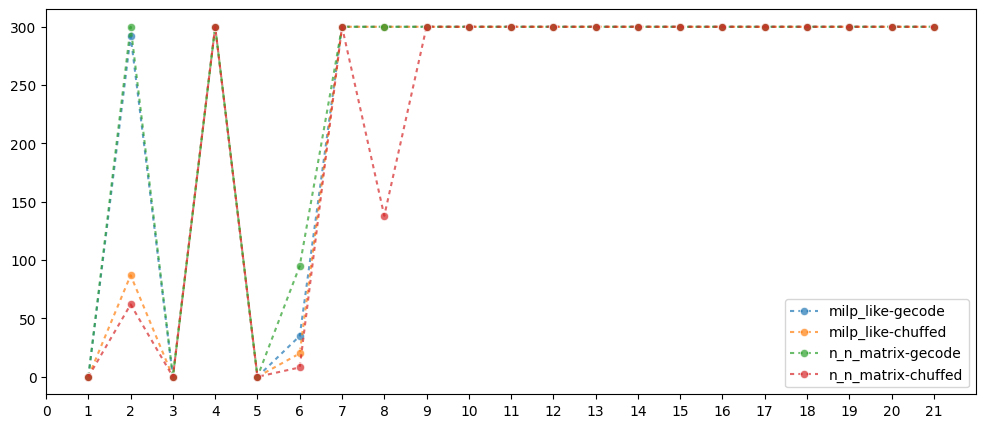

In [35]:
methods_plot = {}

for instance in sorted([*results.keys()]):
    for method in results[instance]:
        if method not in methods_plot: methods_plot[method] = { "instance": [], "time": [] }
        methods_plot[method]["instance"].append(instance)
        methods_plot[method]["time"].append(results[instance][method]["time"])


plt.figure(figsize=(12, 5))

for method in methods_plot:
    sns.lineplot(
        x = methods_plot[method]["instance"],
        y = methods_plot[method]["time"],
        label = method,
        marker = "o",
        alpha = 0.7,
        dashes = (2, 2)
    )

plt.gca().set_xticks(range(len(results)+1), labels=range(0, len(results)+1))
plt.legend()
plt.show()